<a href="https://colab.research.google.com/github/ViktorKolarov/Netflix-Analysis/blob/main/NetflixDataAnalyisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First look

In [ ]:
df = pd.read_csv("/content/netflix1.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Removing all duplicates

In [ ]:
#remove all duplicates
df.drop_duplicates(subset = 'show_id')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Finding count of genres

In [ ]:
#grouping by listed_in
df_genres = df.groupby('listed_in').count() ['show_id'].reset_index()
df_genres.sort_values(by = 'show_id', ascending=False)

,listed_in,show_id
325,"Dramas, International Movies",362
273,Documentaries,359
469,Stand-Up Comedy,334
199,"Comedies, Dramas, International Movies",274
318,"Dramas, Independent Movies, International Movies",252
...,...,...
192,"Comedies, Cult Movies, Sci-Fi & Fantasy",1
190,"Comedies, Cult Movies, LGBTQ Movies",1
400,"International TV Shows, Spanish-Language TV Sh...",1
188,"Comedies, Cult Movies, Independent Movies",1


# "Not Given Director" Problem solving

In [ ]:
#grouping by director
dir_df = df.groupby(['director', 'country']).count() ['show_id'].reset_index()
dir_df.sort_values(by='show_id', ascending=False)


,director,country,show_id
3216,Not Given,United States,839
3197,Not Given,Pakistan,402
3215,Not Given,United Kingdom,232
3185,Not Given,Japan,163
3206,Not Given,South Korea,157
...,...,...,...
2118,Josh Aronson,United States,1
2119,Josh Greenbaum,United States,1
2120,"Josh Izenberg, Wynn Padula",United States,1
2121,Josh Mendoza,United States,1


In [ ]:
#creating new clean dataframe by removing "Not Given" director
df_new = df[df.director != "Not Given"]
df_new

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,11/1/2019,2019,TV-Y,24 min,Children & Family Movies
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,9/20/2019,2019,TV-Y,24 min,Children & Family Movies
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,8/30/2019,2019,TV-Y,3 Seasons,Kids' TV
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,12/31/2018,2016,TV-MA,29 min,Documentaries


# Duration Analysis

In [ ]:
df_duration = df.groupby('duration').count() ['show_id'].reset_index()
df_duration.sort_values(by='show_id', ascending=False)

,duration,show_id
0,1 Season,1791
110,2 Seasons,421
138,3 Seasons,198
210,90 min,152
214,94 min,146
...,...,...
113,201 min,1
112,200 min,1
109,196 min,1
155,43 min,1


#TV shows and Movies separation

In [ ]:
#makeing new data frames based on "type" column, one for TV shows and another one fo movies
df_movie = df_new[df_new.type == 'Movie']
df_tvshow = df_new[df_new.type == 'Tv Show']

In [ ]:
#final look at movie dataframe
df_movie

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
...,...,...,...,...,...,...,...,...,...,...
6561,s1554,Movie,The Netflix Afterparty: The Best Shows of The ...,"Krysia Plonka, Kristian Mercado",United States,12/13/2020,2020,TV-MA,59 min,Comedies
6563,s2441,Movie,True: Rainbow Rescue,"Mark Thornton, Todd Kauffman",Canada,6/2/2020,2020,TV-Y,24 min,Children & Family Movies
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,11/1/2019,2019,TV-Y,24 min,Children & Family Movies
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,9/20/2019,2019,TV-Y,24 min,Children & Family Movies


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


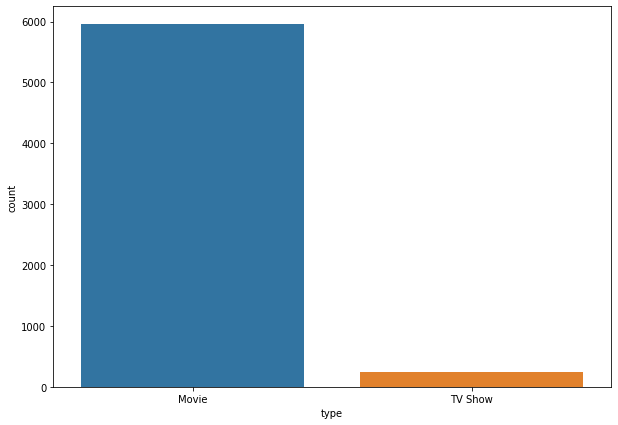

In [ ]:
#setting size
plt.figure(figsize=(10, 7))

#Showing the final result
sns.countplot(df_new['type'])
plt.show()

We can see here that is a really small number of tv shows, im guessing that problem is with removing "Not Given" in Director column.

So im going to make new comaprison with original dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


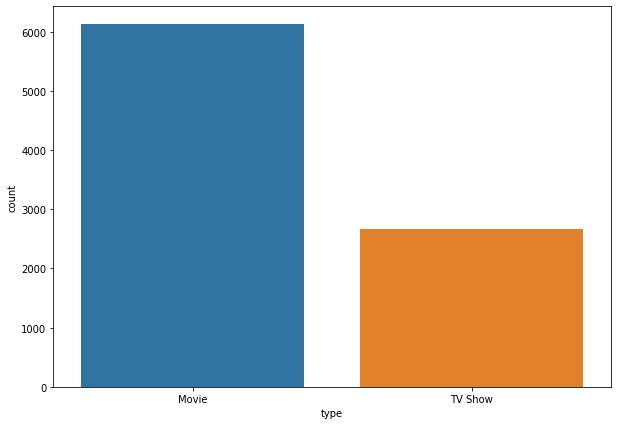

In [ ]:
#setting size
plt.figure(figsize=(10, 7))

#Showing the final result
sns.countplot(df['type'])
plt.show()

Conclusion:
  A lot of Tv Shows dont have given Director in Director column